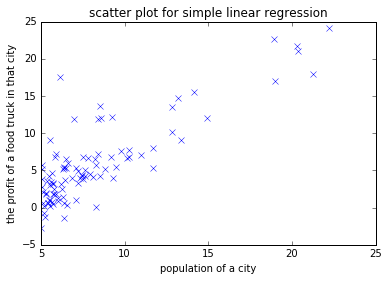

pandas.core.series.Series

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as py
data=pd.read_csv("1.txt")
x=data["population of a city"]
y=data["profit of a food truck"]
py.plot(x,y,"x")
py.title("scatter plot for simple linear regression")
py.xlabel("population of a city")
py.ylabel("the profit of a food truck in that city")
py.show()
type(x)

In [24]:
iterations = 1500;
alpha = 0.01;
x0 = np.ones(np.size(x))
X=np.array([x0,x]).T

In [25]:
#COST FUNCTION TO MEASURE THE ACCURACY
def cost(X,y, theta=[[0],[0]]):
    m=y.size
    h=X.dot(theta)
    return (np.sum(np.square((h - y)))/(2 * m))

In [26]:
theta=np.array([0,0]) #weights
print "The initial cost is",cost(X,y,theta)

The initial cost is 32.0727338775


In [27]:
#gradient descent
def gradient(X,y,theta,alpha,iterations):
    cost_hist=np.zeros(iterations)
    for i in range(iterations):
        h = X.dot(theta)
        theta=theta-alpha*((X.T.dot(h-y))/y.size)
        cost_hist[i]=cost(X,y,theta)
    return theta,cost_hist

In [28]:
final_theta,history=gradient(X,y,theta,alpha,iterations)
print "The optimized set of weights are",final_theta

The optimized set of weights are [-3.63029144  1.16636235]


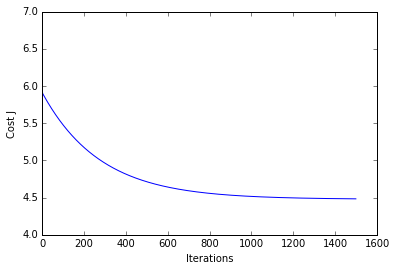

In [29]:
py.plot(history)
py.ylabel('Cost J')
py.xlabel('Iterations');

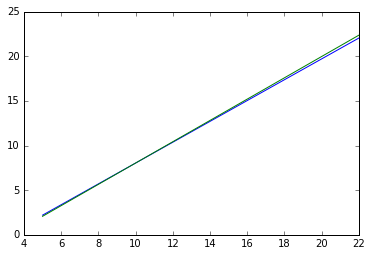

In [30]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
normal_x=np.arange(5,23)
pred_y=final_theta[0]+normal_x.dot(final_theta[1])
py.plot(normal_x,pred_y,label="model form scratch")
py.plot(normal_x, regr.intercept_+regr.coef_*normal_x, label='Linear regression (Scikit-learn GLM)')
py.show()